In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
ds1 = pd.read_csv(r'C:\Users\amits\OneDrive\Desktop\DataScience\end to end data sets\boston_house_price.csv')

In [3]:
ds1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


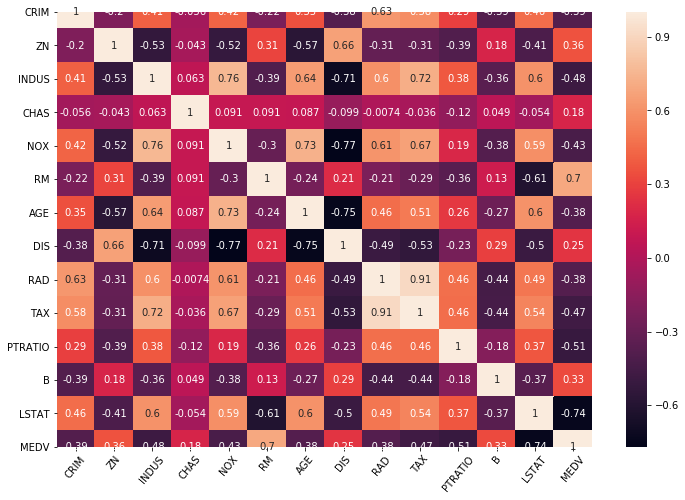

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(ds1.corr(), xticklabels=ds1.corr().columns.values,
            yticklabels=ds1.corr().columns.values, annot=True);
plt.xticks(rotation=50)
plt.show()

In [21]:
X = pd.DataFrame(np.c_[ds1['RM'],ds1['LSTAT']], columns=['RM','LSTAT'])
Y = ds1['MEDV']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

C:\Users\amits\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
model = sm.OLS(Y_train,X_train).fit()
predictions = model.predict(X_test)
r2_model = r2_score(Y_test, predictions)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     392.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.83e-95
Time:                        15:46:00   Log-Likelihood:                -1252.0
No. Observations:                 404   AIC:                             2510.
Df Residuals:                     401   BIC:                             2522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2625      3.513     -0.359      0.719      -8.168       5.643
RM             5.1091      0.492     10.379      0.000       4.141       6.077
LSTAT         -0.6549      0.047    -13.979      0.000      -0.747      -0.563
==============================================================================
Omnibus:                       88.171   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.848
Skew:                           1.088   Prob(JB):                     2.71e-46
Kurtosis:                       5.780   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

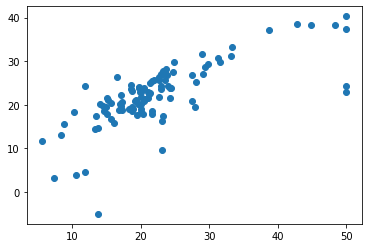

In [25]:
plt.scatter(Y_test, predictions)
plt.show()

In [1]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Dropping null values from dataframe
ds2 = ds1.dropna()

In [28]:
ds2.shape

(506, 14)

In [29]:
# Gather features
x = ds2.iloc[:,0:]
y = ds2.iloc[:,0]

In [30]:
# Calculating VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [31]:
# Inspect VIF
vif.round(1)

,VIF Factor,features
0,2.1,CRIM
1,2.9,ZN
2,14.5,INDUS
3,1.2,CHAS
4,74.0,NOX
5,136.1,RM
6,21.4,AGE
7,15.4,DIS
8,15.4,RAD
9,61.9,TAX


Ridge

In [32]:
from sklearn.linear_model import Ridge
l_ridge = Ridge(alpha=0.3, random_state=0)
l_ridge.fit(X_train, Y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [34]:
ridge_predict = l_ridge.predict(X_test)
# Calculating MSE

ridge_mse = np.mean((ridge_predict - Y_test)** 2)
print("Mean Squared Error",ridge_mse)

# Accuracy Score
score = l_ridge.score(X_test,Y_test)
print("Accuracy",score)

Mean Squared Error 37.38249708654249
Accuracy 0.5409159561793206


In [35]:
l_ridge = Ridge(alpha=0.03, random_state=0)
l_ridge.fit(X_train, Y_train)

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [36]:
ridge_predict = l_ridge.predict(X_test)
# Calculating MSE

ridge_mse = np.mean((ridge_predict - Y_test)** 2)
print("Mean Squared Error",ridge_mse)

# Accuracy Score
score = l_ridge.score(X_test,Y_test)
print("Accuracy",score)

Mean Squared Error 37.383039553558774
Accuracy 0.5409092942928528


In [37]:
l_ridge = Ridge(alpha=0.01, random_state=0)
l_ridge.fit(X_train, Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [38]:
ridge_predict = l_ridge.predict(X_test)
# Calculating MSE

ridge_mse = np.mean((ridge_predict - Y_test)** 2)
print("Mean Squared Error",ridge_mse)

# Accuracy Score
score = l_ridge.score(X_test,Y_test)
print("Accuracy",score)

Mean Squared Error 37.38308348061699
Accuracy 0.5409087548368748


In [39]:
l_ridge = Ridge(alpha=2, random_state=0)
l_ridge.fit(X_train, Y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

In [40]:
ridge_predict = l_ridge.predict(X_test)
# Calculating MSE

ridge_mse = np.mean((ridge_predict - Y_test)** 2)
print("Mean Squared Error",ridge_mse)

# Accuracy Score
score = l_ridge.score(X_test,Y_test)
print("Accuracy",score)

Mean Squared Error 37.3811740591751
Accuracy 0.540932203910244


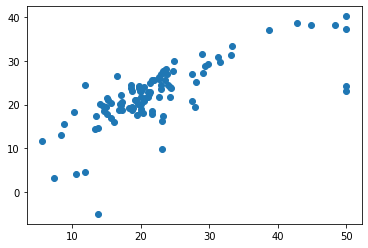

In [41]:
plt.scatter(Y_test, ridge_predict)
plt.show()

Lasso

In [42]:
from sklearn.linear_model import Lasso
l_lasso = Lasso(alpha=0.3, random_state=0)
l_lasso.fit(X_train, Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
lasso_predict = l_lasso.predict(X_test)
# Calculating MSE

lasso_mse = np.mean((lasso_predict - Y_test)** 2)
print("Mean Squared Error: ",lasso_mse)

# Accuracy Score
score = l_lasso.score(X_test,Y_test)
print("Accuracy : ",score)

Mean Squared Error:  37.62412813594478
Accuracy :  0.5379485525033321


In [44]:
l_lasso = Lasso(alpha=0.03, random_state=0)
l_lasso.fit(X_train, Y_train)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
lasso_predict = l_lasso.predict(X_test)
# Calculating MSE

lasso_mse = np.mean((lasso_predict - Y_test)** 2)
print("Mean Squared Error: ",lasso_mse)

# Accuracy Score
score = l_lasso.score(X_test,Y_test)
print("Accuracy : ",score)

Mean Squared Error:  37.377974027621484
Accuracy :  0.5409715026072407


In [46]:
l_lasso = Lasso(alpha=0.05, random_state=0)
l_lasso.fit(X_train, Y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
lasso_predict = l_lasso.predict(X_test)
# Calculating MSE

lasso_mse = np.mean((lasso_predict - Y_test)** 2)
print("Mean Squared Error: ",lasso_mse)

# Accuracy Score
score = l_lasso.score(X_test,Y_test)
print("Accuracy : ",score)

Mean Squared Error:  37.37815253163296
Accuracy :  0.5409693104491502


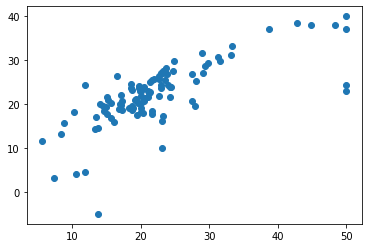

In [48]:
plt.scatter(Y_test, lasso_predict)
plt.show()